## Del 2: Lineær regression i Python

Nu har I set lineær regression som matematik. Det er faktisk ikke alt for svært at skrive op i Python..., husk at formlen for en prediciton i lineær regression er følgende:

$$\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\beta}}$$

Dette er selvfølgelig lidt forskelligt fra det rigtige (orakel) som genererer dataen:

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

Men den kan vi jo som ML udviklere ikke finde... så wgaf?

Vi kan dog finde et **estimat** for de rigtige vægte. Det er altså estimatoren som minimerer den kvadrerede fejl $\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2$, denne findes for lineær regression ved følgende formel:

$$\widehat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$$

**Igennem meget af denne opgave, kommer vi til at arbejde med data vi selv genererer. Dette er måske lidt af et taget eksempel, men det er for at give en bedre intuition for hvornår lineær regression rent faktisk virker.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Opgave 1. Data generering

**Som sagt, så bruger vi genereret data i disse opgaver, da det kan give os en lidt bedre ide for hvad rollen af en model er, i hvert fald i lineær regression.**

**1.1 Undersøg dataen der er genereret med standardinstillingerne. Hvordan ligger den sig rundt om orakelfunktionen?**

**1.2 Variér støjen i dataen, hvordan påvirker en anden mean værdi og en anden varians henholdsvis den genereret data? Hvad er "værst" for en model og hvorfor?**

In [2]:
def generate_data(n, from_, to, oracle, noise_mean=0, noise_var=1):
    # Generer noget et dimensionelt data (vores features)
    x_vals = np.random.uniform(low=from_, high=to, size=n)

    # Apply vores oracle funktion alle features, derefter tilføj støj
    y_vals = np.array(list(map(oracle, x_vals)))
    noise = np.random.normal(loc=noise_mean, scale=noise_var, size=n)

    y_vals = y_vals + noise
    
    return x_vals, y_vals

def split_train_test(x_vals, y_vals, train_ratio=0.8):
    """
    Split datasættet til træning og test tilfældigt
    En lidt mere udspekluret måde end der bliver brugt ellers...
    """
    n = x_vals.shape[0]
    indices = np.arange(n)

    # Shuffle indekser for at sikre tilfældighed
    np.random.shuffle(indices)

    # Find størrelse af træningssættet
    train_size = int(n * train_ratio)
    train_indices = indices[:train_size]

    # Resten af punkterne må være testsættet
    test_indices = indices[train_size:]

    # Opdel vores datasæt i train og test
    train_xs = x_vals[train_indices]
    train_ys = y_vals[train_indices]

    test_xs = x_vals[test_indices]
    test_ys = y_vals[test_indices]

    return train_xs, train_ys, test_xs, test_ys

In [3]:
# Eksempel på brug af at generere dataen

a = 2
b = 5
def orakel(x):
    # Orakelfunktion, ændre denne hvis du vil ændre på oraklet
    return x * a + b

# Simpel standard normalfordelt støj, ændre på dette hvis du ønsker andet støj
mu = 0
sigma = 1

# Generer data med funktionen
features, y = generate_data(100, 0, 4, oracle=orakel, noise_mean=mu, noise_var=sigma)

# Opdel i træning og i test 
train_features, train_y, test_features, test_y = split_train_test(features, y)


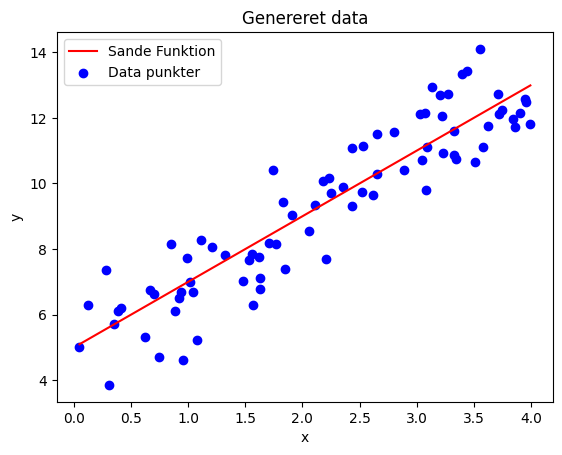

In [4]:
def plot_data(features, y, oracle=None):
    """
    Funktion til at plotte vores data inklusiv vores orakelfunktion
    """
    if orakel is not None:
        xs = np.linspace(np.min(features), np.max(features), num=features.shape[0])
        true_values = np.array(list(map(oracle, xs)))
        plt.plot(xs, true_values, label="Sande Funktion", color='red')


    plt.scatter(features, y, label='Data punkter', color='blue')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Genereret data")
    plt.legend()
    plt.show()

plot_data(features=train_features, y=train_y, oracle=orakel)

## Opgave 2: Lineær regression

**At lave lineær regression er såååh nemt som at benytte sig af en formel til at minimere mean squared error. Det er basically alt vi kan gøre med det**

**2.1: Udfyld linear_regression funktionen så den korrekt udregner de rigtige vægte til lineær regression**

**2.2: Find ud af hvilken effekt en skæring med y aksen har ved at prøve at sætte intercept til at være False**

$\dots$

**2.3: Ændr i orakel funktionen så den bliver af højere orden, prøv så at bruge lineær regression til at løse problemet igen**

**2.4: Overvej om lineær regression også kan bruges hvis orakel funktionen indeholder enten $\exp{x}$ eller $\sin{x}$. HINT: Kan vi gøre noget ved vores features?**

$\dots$

In [5]:
def linear_regression(features, y, intercept=True, higher_orders=[]):
    """
    Funktion der, givet vores features og targets (y), finder den mest optimale
    lineær regressionsløsning

    Du kan inkludere højere ordener såsom [2] hvis du ønsker at gøre den mere kompleks
    """
    n_samples = features.shape[0]

    # Laver nyt navn for at vise vi har med vores data matrix at gøre
    X = features[:, None]

    # Tilføj højere ordener (X^2, X^3, osv.) 
    for order in higher_orders:
        if isinstance(order, int) and order > 1:
            higher_vector = X ** order
            X = np.hstack((X, higher_vector))

    # Tilføj skæring med y-aksen - også kaldt 'bias'
    if intercept:
        one_vector = np.ones((n_samples, 1))
        X = np.hstack((one_vector, X))

    # Udregn lineær regressions bud på de bedste vægte
    # TODO: Find de bedste vægte
    best_weights = np.linalg.inv(X.T @ X) @ X.T @ y

    return best_weights, X  

# Få de bedste vægte til lineær regression...
best_weights, X = linear_regression(train_features, train_y, True, [2])

print(f"De bedste vægte er {best_weights}")

De bedste vægte er [ 4.75602737  2.17547141 -0.03355398]


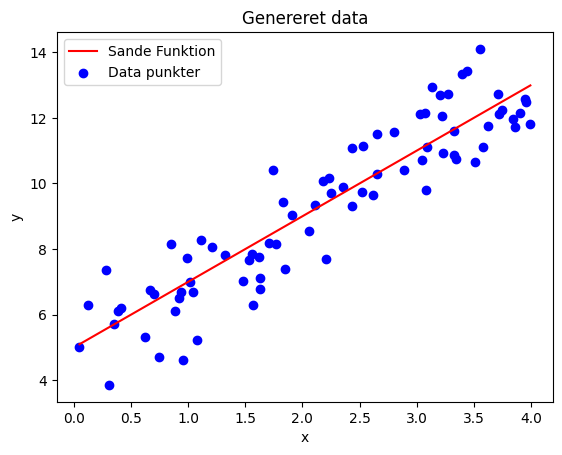

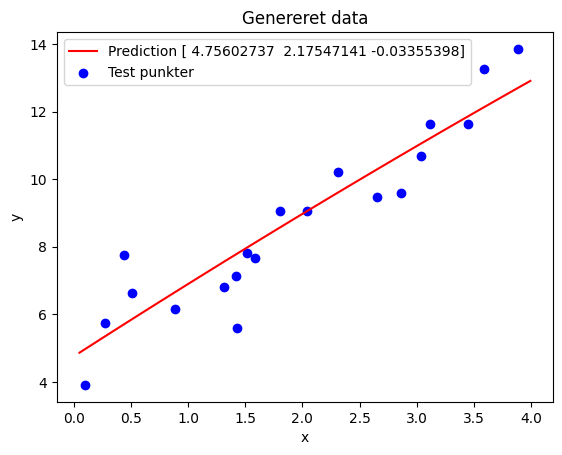

In [6]:
# Anvend de bedste vægte til at lave predictions...
plot_data(features=train_features, y=train_y, oracle=orakel)

# Lav nogle 'dummy features' til bare at vise prediction linjen som den ville være
dummy_features = np.linspace(np.min(train_features), np.max(train_features), train_features.shape[0])
_, dummy_X = linear_regression(dummy_features, train_y, True, [2])

# Lav predictions på disse 'dummy features'
predictions = dummy_X @ best_weights

plt.plot(dummy_features, predictions, label=f'Prediction {best_weights}', color='Red')
plt.scatter(test_features, test_y, label='Test punkter', color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Genereret data")
plt.legend()
plt.show()
